In [1]:
import numpy as np
import pandas as pd
from glob import glob
# merge csv files
def merge_files(SOURCE):
    files_list = sorted(glob(SOURCE + '\*'))
    df_list = []
    for num, path in enumerate(files_list):
        df = pd.read_csv(path)
        df = df.drop(['business_id','city','date','state','postal_code','review_count','attributes','name','latitude','longitude','attributes','review_count','address','user_id','text_length'], axis=1)
        df_list.append(df)
    df = pd.concat(df_list, join='outer', ignore_index=True, axis=0, sort=True)
    return df

SOURCE = 'files_yelp'
yelp = merge_files(SOURCE)
yelp = yelp.drop(['stars'], axis=1)
print(yelp.shape)
yelp.head()

(64109, 3)


,categories,review_stars,text
0,"Karate, Active Life, Gyms, Martial Arts, Fitne...",1,While Sensei Joe is a genuinely good person an...
1,"Karate, Active Life, Gyms, Martial Arts, Fitne...",5,My daughter joined about 5 months ago and she ...
2,"Karate, Active Life, Gyms, Martial Arts, Fitne...",1,I had high hopes when I started taking the kic...
3,"Karate, Active Life, Gyms, Martial Arts, Fitne...",5,"Sensei Joe is a Karate-Geek, and I mean that i..."
4,"Karate, Active Life, Gyms, Martial Arts, Fitne...",5,I have been working out on my own for a very l...


In [2]:
Fitness_yelp = yelp[yelp['categories'].str.contains('Fitness')]
print(Fitness_yelp.shape)
Fitness_yelp.head()

(64109, 3)


,categories,review_stars,text
0,"Karate, Active Life, Gyms, Martial Arts, Fitne...",1,While Sensei Joe is a genuinely good person an...
1,"Karate, Active Life, Gyms, Martial Arts, Fitne...",5,My daughter joined about 5 months ago and she ...
2,"Karate, Active Life, Gyms, Martial Arts, Fitne...",1,I had high hopes when I started taking the kic...
3,"Karate, Active Life, Gyms, Martial Arts, Fitne...",5,"Sensei Joe is a Karate-Geek, and I mean that i..."
4,"Karate, Active Life, Gyms, Martial Arts, Fitne...",5,I have been working out on my own for a very l...


Text(0, 0.5, 'Reviews of Fitness')

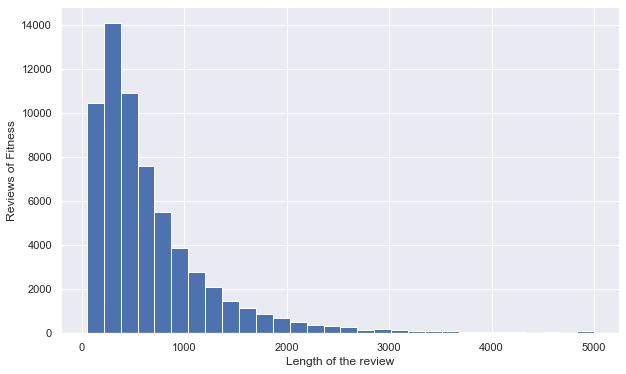

In [3]:
import matplotlib.pyplot as plt
import seaborn


plt.rc('figure', figsize=(10,6))
seaborn.set()
colors = seaborn.color_palette()
Fitness_yelp.text.dropna().str.len().hist(bins=30)
plt.xlabel('Length of the review')
plt.ylabel('Number of reviews')
plt.ylabel('Reviews of Fitness')

In [4]:
sorted(Fitness_yelp['review_stars'].unique())

[1, 2, 3, 4, 5]

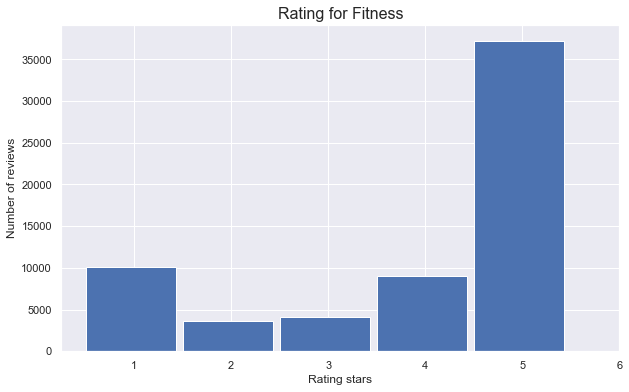

In [5]:
bins = [1 ,2 ,3 ,4, 5, 6]
Fitness_yelp.review_stars.hist(bins=bins, align='left', width=0.93)
plt.xticks(bins)
plt.xlabel('Rating stars')
plt.ylabel('Number of reviews')
plt.title("Rating for Fitness", fontsize=16)
plt.show()

In [6]:
target_count = Fitness_yelp.review_stars.value_counts()
print('1 Star:', target_count[1])
print('2 Star:', target_count[2])
print('3 Star:', target_count[3])
print('4 Star:', target_count[4])
print('5 Star:', target_count[5])

1 Star: 10101
2 Star: 3634
3 Star: 4094
4 Star: 9028
5 Star: 37252


In [9]:
#Average Rating of Fitness
ratings = list(Fitness_yelp['review_stars'])
print("Average Rating of Fitness is:",sum(ratings)/len(ratings))

Average Rating of Fitness is: 3.9311641111232434


In [10]:
#average length of reviews
totalreviews = list(Fitness_yelp['text'])
length = []
for i in range(0,len(totalreviews)):
        totalreviews[i] = str(totalreviews[i])
        a = len(totalreviews[i].split(' '))
        length.append(a)

    
print("On average a review of Fitness has about:", sum(length)/len(length),"words in them")

On average a review of Fitness has about: 126.48910449390881 words in them


In [11]:
#total reviews number
len(length)

64109

In [12]:
Fitness_yelp['length'] =  length
Fitness_yelp['ratings'] =  ratings
five_star = Fitness_yelp.loc[Fitness_yelp['ratings'] == 5,:]
five = sum(five_star['length'])/len(five_star['length'])
four_star = Fitness_yelp.loc[Fitness_yelp['ratings'] == 4,:]
four = sum(four_star['length'])/len(four_star['length'])
three_star = Fitness_yelp.loc[Fitness_yelp['ratings'] == 3,:]
three = sum(three_star['length'])/len(three_star['length'])
two_star = Fitness_yelp.loc[Fitness_yelp['ratings'] == 2,:]
two = sum(two_star['length'])/len(two_star['length'])
one_star = Fitness_yelp.loc[Fitness_yelp['ratings'] == 1,:]
one = sum(one_star['length'])/len(one_star['length'])

In [13]:
print("five:",five,"four:",four,"three:",three,"two:",two,"one:",one)

five: 103.93246000214754 four: 141.92401417811254 three: 165.00341963849536 two: 171.38992845349478 one: 164.1177111177111


In [14]:
#5 star has the shortest review length, 2 star has the longest

c:\users\wang\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


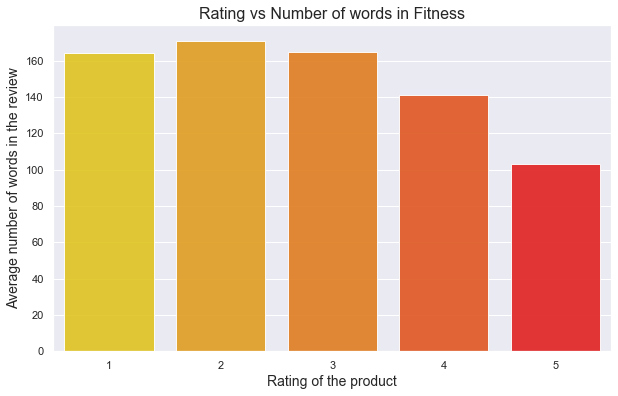

In [13]:
colors = ['#ffd900', '#ffa600','#ff7b00', '#ff4800', '#ff0000']
seaborn.set_palette(seaborn.color_palette(colors))
top = ['1','2','3','4','5']
value = [int(one), int(two),int(three),int(four),int(five)]
seaborn.barplot(top, value, alpha=0.9)
plt.xlabel('Rating of the product', fontsize=14)
plt.ylabel('Average number of words in the review', fontsize=14)
plt.title("Rating vs Number of words in Fitness", fontsize=16)
plt.show()

# Baseline

In [39]:
#The simplest baseline for each of these predictive tasks is a model that always predicts the most common rating.
Fitness_yelp['baseline_rating'] = 5

print("Baseline of rating Fitness = 5" )

Baseline of rating Fitness = 5


In [17]:
t = Fitness_yelp[['review_stars', 'baseline_rating']].dropna(how='any')

In [18]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


precision = metrics.precision_score(t.review_stars, t.baseline_rating, average='macro')
recall = metrics.recall_score(t.review_stars, t.baseline_rating, average='macro')
f1 = metrics.f1_score(t.review_stars, t.baseline_rating, average='macro')
accuracy = accuracy_score(t.review_stars, t.baseline_rating)

baselineResult = {}

data = {'precision':precision,
        'recall':recall,
        'f1_score':f1,
        'accuracy':accuracy}

baselineResult['Baseline of Fitness'] = data
pd.DataFrame(baselineResult).T

c:\users\wang\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,accuracy,f1_score,precision,recall
Baseline of Fitness,0.581073,0.147007,0.116215,0.2


# ________________________________________

In [19]:
# Import Statements
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer 
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline

# Term frequency (TF) - Inverse Document Frequency (IDF)

In [20]:
# Instances for pipeline
#verbose = to show progress, higher number show more details
#n_jobs = n of process running in parallelly
#rus = RandomUnderSampler(sampling_strategy='not minority')
rus = RandomUnderSampler(sampling_strategy='not minority') 
rfc = RandomForestClassifier(warm_start=True, n_estimators=300, oob_score=True, verbose=2, n_jobs=4)
vect = TfidfVectorizer(stop_words='english', ngram_range=(1,1),encoding='utf-8')

In [22]:
from sklearn.model_selection import train_test_split

X = Fitness_yelp['text']
Y = Fitness_yelp['review_stars']

X_new, Y_new = rus.fit_sample(X.values.reshape(-1,1),Y)

print('Y_new length:',len(Y_new))

Y_new length: 18170


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, Y_new, test_size=0.3, random_state=1)

In [24]:
pipe_fitness = Pipeline([('vect', vect), ('rfc', rfc)])

In [25]:
pipe_fitness.fit(X_train.flatten(),y_train)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 300building tree 2 of 300building tree 3 of 300


building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300


[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    2.4s


building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
building tree 43 of 300
building tree 44 of 300
building tree 45 of 300
building tree 46 of 300
building tree 47 of 300
building tree 48 of 300
building tree 49 of 300
building tree 50 of 300
building tree 51 of 300
building tree 52 of 300
building tree 53 of 300
building tree 54 of 300
building tree 55 of 300
building tree 56 of 300
building tree 57 of 300
building tree 58 of 300
building tree 59 of 300
building tree 60 of 300
building tree 61 of 300
building tree 62 of 300
building tree 63 of 300
building tree 64 of 300
building tree 65 of 300
building tree 66 of 300
building tree 67 of 300
building tree 68 of 300
building tree 69 of 300
building tree 70 of 300
building tree 71 of 300
building tree 72 of 300
building tree 73 of 300
building tree 74 of 300
building tree 75 of 300
building tree 76 of 300
building tree 77 of 300
building tree 78

[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   10.9s


building tree 161 of 300
building tree 162 of 300
building tree 163 of 300
building tree 164 of 300
building tree 165 of 300
building tree 166 of 300
building tree 167 of 300
building tree 168 of 300
building tree 169 of 300
building tree 170 of 300
building tree 171 of 300
building tree 172 of 300
building tree 173 of 300
building tree 174 of 300
building tree 175 of 300
building tree 176 of 300
building tree 177 of 300
building tree 178 of 300
building tree 179 of 300
building tree 180 of 300
building tree 181 of 300
building tree 182 of 300
building tree 183 of 300
building tree 184 of 300
building tree 185 of 300
building tree 186 of 300
building tree 187 of 300
building tree 188 of 300
building tree 189 of 300
building tree 190 of 300
building tree 191 of 300
building tree 192 of 300
building tree 193 of 300
building tree 194 of 300
building tree 195 of 300
building tree 196 of 300
building tree 197 of 300
building tree 198 of 300
building tree 199 of 300
building tree 200 of 300


[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:   20.8s finished


Pipeline(steps=[('vect', TfidfVectorizer(stop_words='english')),
                ('rfc',
                 RandomForestClassifier(n_estimators=300, n_jobs=4,
                                        oob_score=True, verbose=2,
                                        warm_start=True))])

In [26]:
rfc.n_features_

28439

In [27]:
rfc.n_outputs_

1

In [28]:
rfc.n_classes_

5

In [30]:
y_pred=pipe_fitness.predict(X_test.flatten())

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.2s finished


In [31]:
from sklearn import metrics, preprocessing, tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, make_scorer
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

In [33]:
def print_evaluation_scores(y_test, y_pred):
    print("RFC For Fitness:")
    print("Accuracy score:",accuracy_score(y_test, y_pred))
    print("F1 score:",f1_score(y_test, y_pred, average='weighted'))
print_evaluation_scores(y_test, y_pred)

RFC For Fitness:
Accuracy score: 0.5177031737295908
F1 score: 0.4885874866422525


In [22]:
def print_evaluation_scores(y_test, y_pred):
    print("For Fitness:")
    print("Accuracy score:",accuracy_score(y_test, y_pred))
    print("F1 score:",f1_score(y_test, y_pred, average='weighted'))
print_evaluation_scores(y_test, y_pred)

For Fitness:
Accuracy score: 0.520821867547239
F1 score: 0.49242649600989363


In [34]:
#support is the number of the reviews in this test size (y_test) 89300*0.3=26790
print('\t\tCLASSIFICATIION METRICS RFC for Fitness\n')
print(metrics.classification_report(y_test, y_pred))

		CLASSIFICATIION METRICS RFC for Fitness

              precision    recall  f1-score   support

           1       0.53      0.82      0.65      1074
           2       0.45      0.22      0.30      1114
           3       0.43      0.36      0.39      1102
           4       0.48      0.38      0.42      1077
           5       0.59      0.82      0.69      1084

    accuracy                           0.52      5451
   macro avg       0.50      0.52      0.49      5451
weighted avg       0.50      0.52      0.49      5451



In [35]:
print(metrics.confusion_matrix(y_test, y_pred))

[[877 110  42  11  34]
 [450 244 236  86  98]
 [212 139 399 223 129]
 [ 71  37 212 408 349]
 [ 33   9  31 117 894]]


In [37]:
metrics.accuracy_score(y_test,y_pred)

0.5177031737295908

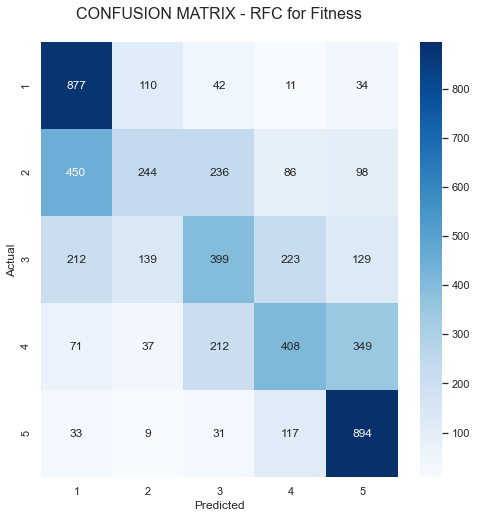

In [38]:
#using seaborn to plot
# for RFC
import matplotlib.pyplot as plt
import seaborn
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
seaborn.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d', xticklabels=[1,2,3,4,5], yticklabels=[1,2,3,4,5])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - RFC for Fitness\n", size=16);

In [21]:
import pickle
pickle.dump(pipe_fitness, open('Fitness_yelp_review_predict_star.pkl', 'wb'))

 Training Model

In [3]:
# Import Statements
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer 
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline

# Term frequency (TF) - Inverse Document Frequency (IDF)

In [4]:
# Instances for pipeline
#verbose = to show progress, higher number show more details
#n_jobs = n of process running in parallelly
#rus = RandomUnderSampler(sampling_strategy='not minority')
rus = RandomUnderSampler(sampling_strategy='not minority') 
rfc = RandomForestClassifier(warm_start=True, n_estimators=300, oob_score=True, verbose=2, n_jobs=4)
vect = TfidfVectorizer(stop_words='english', ngram_range=(1,1),encoding='utf-8')

In [ ]:
from sklearn.model_selection import train_test_split

X = Fitness_yelp['text']
Y = Fitness_yelp['review_stars']

X_new, Y_new = rus.fit_sample(X.values.reshape(-1,1),Y)

print('Y_new length:',len(Y_new))

In [5]:
# Specify the pipeline
pipe_fitness = Pipeline([('vect', vect), ('rfc', rfc)])
#or we can just set test_size=1 from train_test_split
pipe_fitness.fit(X_new.values.astype('U'), Y_new)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400building tree 4 of 400

building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400building tree 26 of 400

building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400


[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   27.6s


building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78

[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  2.0min


building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400


[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:  4.5min


building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=4)]: Done 400 out of 400 | elapsed:  5.0min finished


Pipeline(steps=[('vect', TfidfVectorizer(stop_words='english')),
                ('rfc',
                 RandomForestClassifier(n_estimators=400, n_jobs=4,
                                        oob_score=True, verbose=2,
                                        warm_start=True))])

In [6]:
import pickle
pickle.dump(pipe_fitness, open('Fitness_yelp_review_predict_star.pkl', 'wb'))

In [8]:
my_review = ["I already knew App Academy would be tough before I applied, but I never would've thought it was the most difficult experience I had ever imagine. As someone with no prior coding experience, I would say the first few weeks were really hard on me and it doesn't get easier. Eventually, it's something that everyone gets accustomed to. Before I knew it, it was 3 months already and I can finally tell people that I'm a software developer.To sum things up, App Academy is harder than anything you imagined, but it will also be the most rewarding experience in your life."]
pipe_fitness.predict(my_review)[0]

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 400 out of 400 | elapsed:    0.0s finished


5